In [2]:
import pandas as pd
df  = spark.read.parquet('s3://adtech-ml-perf-ads-us-east-1-prod-v1/live_inventory_forecasting/data/DAU/').toPandas()
df2 = spark.read.parquet('s3://adtech-ml-perf-ads-us-east-1-prod-v1/live_inventory_forecasting/data/subs_AU/').toPandas()

In [7]:
df3 = df.rename(columns={'count': 'DAU'})
df3

,cd,DAU
0,2019-01-01,20480305
1,2019-01-02,20418006
2,2019-01-03,23127866
3,2019-01-04,21380719
4,2019-01-05,22954026
...,...,...
1488,2023-01-28,36437019
1489,2023-01-29,45599737
1490,2023-01-30,36506297
1491,2023-01-31,32292194


In [15]:
df4 = df2.groupby('cd').n_pid.sum().reset_index().rename(columns={'n_pid': 'sub_DAU'})
df4['cd'] = df4.cd.map(str)
df4

,cd,sub_DAU
0,2019-01-01,244168
1,2019-01-02,231791
2,2019-01-03,271939
3,2019-01-04,256461
4,2019-01-05,273086
...,...,...
1516,2023-02-25,15381625
1517,2023-02-26,16305952
1518,2023-02-27,14333989
1519,2023-02-28,14080835


In [18]:
df5 = df3.merge(df4).sort_values('cd')
df5['free_DAU'] = df5['DAU'] - df5['sub_DAU']
df5

,cd,DAU,sub_DAU,free_DAU
0,2019-01-01,20480305,244168,20236137
1,2019-01-02,20418006,231791,20186215
2,2019-01-03,23127866,271939,22855927
3,2019-01-04,21380719,256461,21124258
4,2019-01-05,22954026,273086,22680940
...,...,...,...,...
1488,2023-01-28,36437019,16195636,20241383
1489,2023-01-29,45599737,22699059,22900678
1490,2023-01-30,36506297,16235196,20271101
1491,2023-01-31,32292194,14620949,17671245


In [21]:
df5.to_parquet('s3://adtech-ml-perf-ads-us-east-1-prod-v1/live_inventory_forecasting/data/DAU_full/dau_full.parquet')

In [1]:
import pandas as pd
df5 = pd.read_parquet('s3://adtech-ml-perf-ads-us-east-1-prod-v1/live_inventory_forecasting/data/DAU_full/dau_full.parquet')

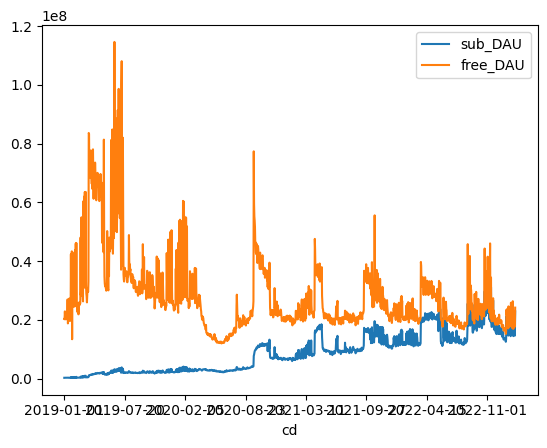

In [3]:
df5.plot(x='cd', y=['sub_DAU', 'free_DAU']);

In [4]:
df5.to_csv('df5.csv', index=False)

In [23]:
# Data Exploration of order
order_path = 's3://hotstar-ads-ml-us-east-1-prod/content-insight/content_return/subs_retention/data/order_base/'
order = spark.read.parquet(f'{order_path}order_start_date=2022-03-26/')

In [24]:
order

order_id,is_recur,transaction_value,order_profit,transaction_currency,is_upgrade,is_cancel,sub_id,dw_p_id,hid,plan_type,order_end_date,actual_order_end_date,partner,billing_frequency,billing_interval_unit,order_start_ts,order_start_seconds,order_end_ts,order_end_seconds,plan_value,cancel_reason,order_cancel_date,order_cancel_seconds,order_cancel_ts,actual_order_end_ts,commercial_pack
21ebecfa399c47f0b...,1,12627,126.27,INR,0,0,8ae459e77de890440...,4a8cba6935775e3ad...,672152af04624130a...,HotstarMobile,2022-06-26,2022-06-26,SELF,3,MONTHS,1648304269000,2022-03-26 14:17:49,1656253069000,2022-06-26 14:17:49,14900,null,null,null,null,1656253069000,hotstarmobile.in....
ea42356bc69744e4a...,0,21102,211.02,INR,0,0,8ae6d64e7fc1ac5f0...,b831c5a609ec91074...,cdd6660946c245748...,HotstarMobile,2023-03-26,2023-03-26,SELF,1,YEARS,1648301354000,2022-03-26 13:29:14,1679837326000,2023-03-26 13:28:46,49900,null,null,null,null,1679837326000,hotstarmobile.in....
3bdfdd6a3ca342049...,0,0,211.4,INR,0,0,8ae44aa37fc44ca10...,2e64ff853772a2532...,67151b40c627479cb...,HotstarMobile,2023-03-26,2023-03-26,JIO,1,YEARS,1648292737000,2022-03-26 11:05:37,1679828737000,2023-03-26 11:05:37,49900,null,null,null,null,1679828737000,jio.in.mobile.yea...
5e5825dca74c4ec88...,0,0,211.4,INR,0,0,8ae44b627fc44c5f0...,3f48cdb9364d89812...,5a64e6f5d8344f8e9...,HotstarMobile,2023-03-26,2023-03-26,JIO,1,YEARS,1648269738000,2022-03-26 04:42:18,1679805738000,2023-03-26 04:42:18,49900,null,null,null,null,1679805738000,jio.in.mobile.yea...
fedaaaf142bc4d71a...,0,42288,422.88,INR,0,0,8ae6de317fbd71b90...,c240f504abf59bc0d...,9334250a38ef4136a...,HotstarMobile,2023-03-26,2023-03-26,SELF,1,YEARS,1648301085000,2022-03-26 13:24:45,1679837068000,2023-03-26 13:24:28,49900,null,null,null,null,1679837068000,hotstarmobile.in....
4a48b417a9ea4fb69...,0,42288,422.88,INR,0,0,8ae404187fbd1c940...,8dacbabdb87e25301...,3cf0d43dec264fe88...,HotstarMobile,2023-03-26,2023-03-26,SELF,1,YEARS,1648304525000,2022-03-26 14:22:05,1679840310000,2023-03-26 14:18:30,49900,null,null,null,null,1679840310000,hotstarmobile.in....
31222aec93174d5a9...,0,127034,1270.34,INR,0,0,8ae4483c7fbd2e580...,17dfa4916aa886ee8...,acn|madhusagar89@...,HotstarPremiumSmp,2023-03-26,2023-03-26,SELF,1,YEARS,1648277193000,2022-03-26 06:46:33,1679813181000,2023-03-26 06:46:21,149900,null,null,null,null,1679813181000,hotstarpremium.in...
42ab9b7662ce46979...,0,42288,422.88,INR,0,0,8ae4c6717fc44cc40...,e7ce3e85dda656ad3...,702e211359b247609...,HotstarMobile,2023-03-26,2023-03-26,SELF,1,YEARS,1648309169000,2022-03-26 15:39:29,1679845120000,2023-03-26 15:38:40,49900,null,null,null,null,1679845120000,hotstarmobile.in....
b9c49aaab8b548dc9...,0,0,72.5,INR,0,0,8ae4aa586f6533430...,0031f758c02d2d818...,acn|ashishnivdeka...,HotstarPremiumSmp,2022-04-26,2022-04-26,TATASKY,1,MONTHS,1648285112000,2022-03-26 08:58:32,1650963512000,2022-04-26 08:58:32,0,null,null,null,null,1650963512000,tatasky.in.premiu...
5c7a749f940e4a7ab...,0,25339,253.39,INR,0,0,8ae6d0e47fc44baf0...,6979df9d96ab8709e...,f6110017bdff40ff8...,HotstarPremiumSmp,2022-05-26,2022-05-26,SELF,1,MONTHS,1648275781000,2022-03-26 06:23:01,1653546161000,2022-05-26 06:22:41,29900,null,null,null,null,1653546161000,hotstarpremium.in...


In [25]:
order.groupby('is_cancel').count().toPandas()

,is_cancel,count
0,1,42019
1,0,786658


In [26]:
42019/(42019+786658)

0.05070612554710702

In [27]:
order_cnt = order.groupby('dw_p_id').count().where('count > 1')
order_cnt.count()

9759

In [28]:
9759/(42019+786658)

0.011776602946624559

In [19]:
order_full = spark.read.parquet(order_path)
order_full.groupby('is_cancel').count().toPandas()

,is_cancel,count
0,1,11726631
1,0,234190169


In [21]:
11726631/(234190169+11726631)

0.04768535943863941

In [20]:
order_cnt_full = order_full.groupby('dw_p_id').count().where('count > 1')
order_cnt_full.count()

45832774

In [22]:
45832774/(234190169+11726631)

0.18637512361904515

# Predict

In [30]:
!pip install -U --user pip

In [ ]:
!pip install --user prophet

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = spark.read.parquet('s3://adtech-ml-perf-ads-us-east-1-prod-v1/live_inventory_forecasting/data/subs_AU/').toPandas()

In [36]:
df

,partner,billing_interval_unit,billing_frequency,n_pid,cd
0,VODAFONE,MONTHS,3,80590,2023-02-05
1,SELF,MONTHS,1,22650,2023-02-05
2,TATASKY,YEARS,1,87856,2023-02-05
3,PAYU,YEARS,1,48955,2023-02-05
4,YUPPTV,MONTHS,1,1524,2023-02-05
...,...,...,...,...,...
20816,TATASKY,MONTHS,1,7,2019-01-13
20817,APPLE,MONTHS,1,27602,2019-01-13
20818,SELF,MONTHS,1,39879,2019-01-13
20819,APPLE,YEARS,1,17417,2019-01-13


In [60]:
df['is_self'] = df.partner.map(lambda x: 'self' if x in ['SELF', 'APPPLE'] else 'partner')
df['is_year'] = df.billing_interval_unit.map(lambda x: 'year' if x == 'YEARS' else 'non_year')

In [61]:
df2 = df.groupby(['cd', 'is_self', 'is_year']).n_pid.sum().reset_index()
df2['category'] = df2.is_self + ' ' + df2.is_year

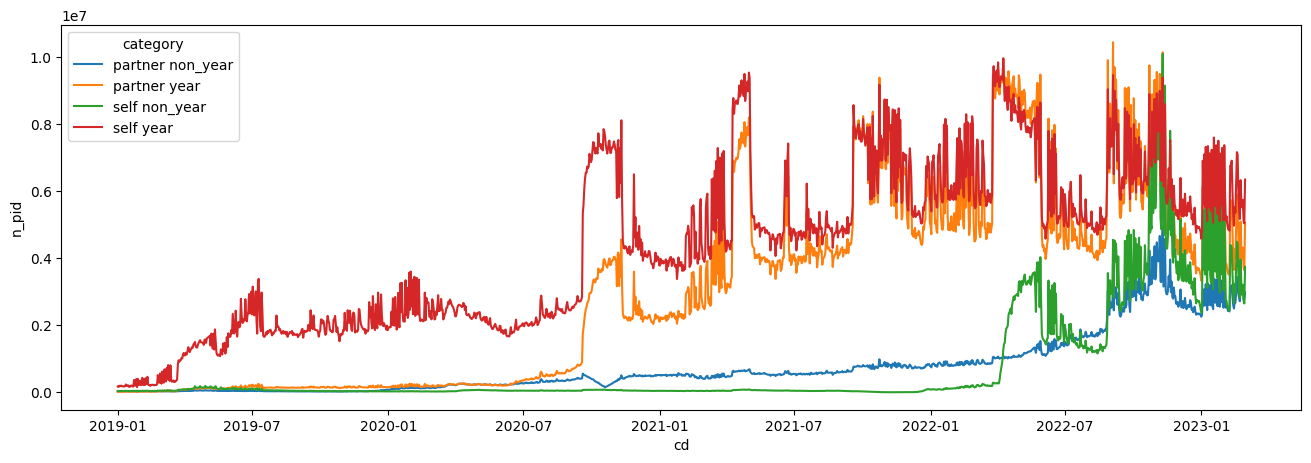

In [68]:
plt.figure(figsize=(16, 5))
sns.lineplot(data=df2, x='cd', y='n_pid', hue='category');

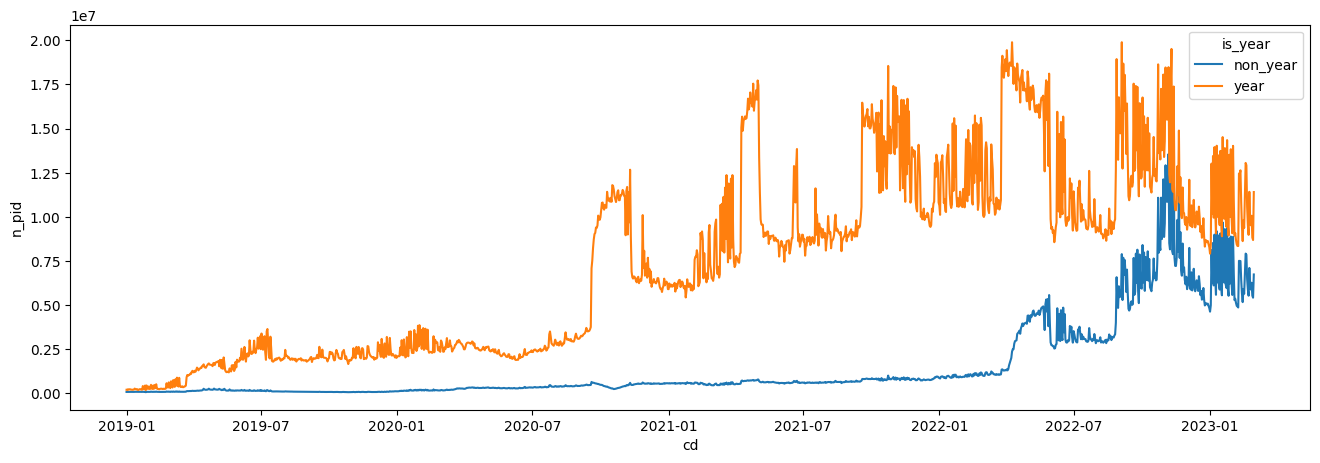

In [73]:
df3 = df.groupby(['cd', 'is_year']).n_pid.sum().reset_index()
plt.figure(figsize=(16, 5))
sns.lineplot(data=df3, x='cd', y='n_pid', hue='is_year');

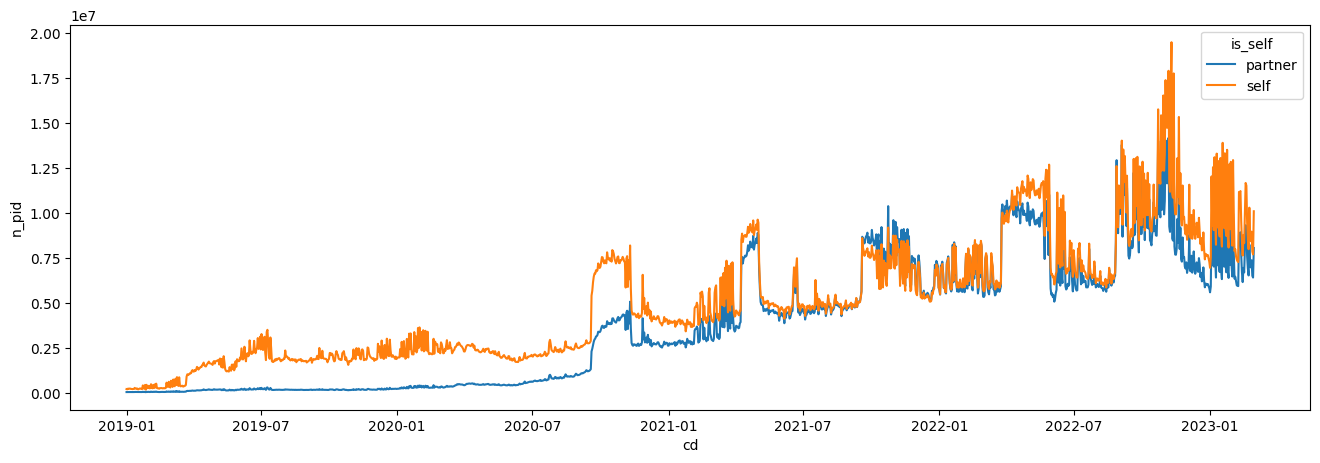

In [74]:
df4 = df.groupby(['cd', 'is_self']).n_pid.sum().reset_index()
plt.figure(figsize=(16, 5))
sns.lineplot(data=df4, x='cd', y='n_pid', hue='is_self');

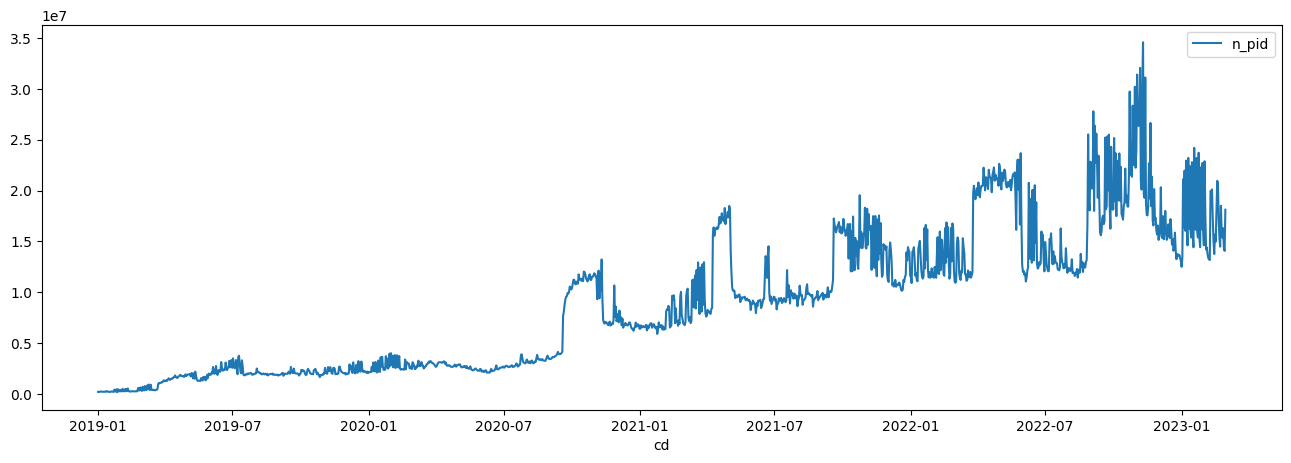

In [79]:
df5 = df.groupby('cd').n_pid.sum().reset_index()
df5.plot('cd', 'n_pid', figsize=(16,5));

In [80]:
df5

,cd,n_pid
0,2019-01-01,244168
1,2019-01-02,231791
2,2019-01-03,271939
3,2019-01-04,256461
4,2019-01-05,273086
...,...,...
1516,2023-02-25,15381625
1517,2023-02-26,16305952
1518,2023-02-27,14333989
1519,2023-02-28,14080835


In [86]:
df6 = pd.concat([df5.cd.map(str).rename('ds'), df5.n_pid.rename('y')], axis=1)

In [91]:
%store df6

Stored 'df6' (DataFrame)


In [1]:
%store -r df6
df6

,ds,y
0,2019-01-01,244168
1,2019-01-02,231791
2,2019-01-03,271939
3,2019-01-04,256461
4,2019-01-05,273086
...,...,...
1516,2023-02-25,15381625
1517,2023-02-26,16305952
1518,2023-02-27,14333989
1519,2023-02-28,14080835


In [2]:
import pandas as pd

In [6]:
from prophet import Prophet
def predict(df):
    holidays = pd.read_csv('holidays.csv')
    m = Prophet(holidays=holidays)
    m.add_country_holidays(country_name='IN')
    model = m.fit(df)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    m.plot(forecast)
    return m

/home/hadoop/.local/lib/python3.7/site-packages/prophet/hdays.py:209: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
12:29:07 - cmdstanpy - INFO - Chain [1] start processing
12:29:07 - cmdstanpy - INFO - Chain [1] done processing
/home/hadoop/.local/lib/python3.7/site-packages/prophet/hdays.py:209: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/home/hadoop/.local/lib/python3.7/site-packages/prophet/hdays.py:209: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)


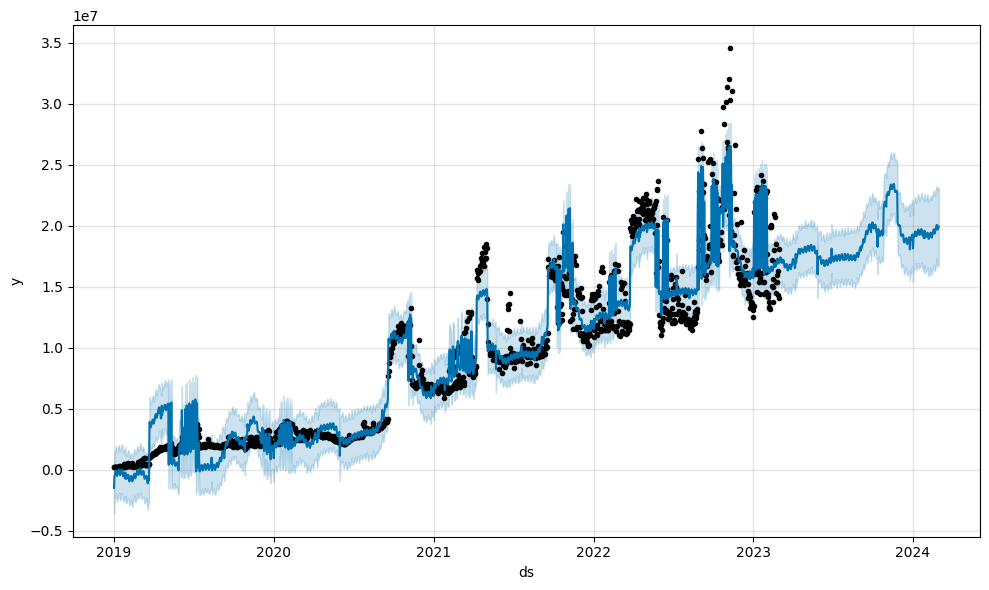

In [8]:
m = predict(df6)

In [11]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
def cv(m):
    t = cross_validation(m, initial='730 days', period='30 days', horizon = '365 days', parallel="processes")
    plot_cross_validation_metric(t, metric='mape')
    met = performance_metrics(t)
    display(met)
    display(met.mape.mean())

/home/hadoop/.local/lib/python3.7/site-packages/prophet/hdays.py:209: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/home/hadoop/.local/lib/python3.7/site-packages/prophet/hdays.py:209: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/home/hadoop/.local/lib/python3.7/site-packages/prophet/hdays.py:209: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/home/hadoop/.local/lib/python3.7/site-packages/prophet/hdays.py:209: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
12:43:44 - cmdstanpy - INFO - Chain [1] start processing
12:43:44 - cmdstanpy - INFO - Chain [1] start processing
12:43:44 - cmdstanpy - INFO - Chain [1] start processing
12:43:44 - cmdstanpy - INFO - Chain [1] start processing
12:43:44 - cmdstanpy - INFO - Chain [1] done processing
/home/hadoop

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,7.108887e+12,2.666250e+06,2.055951e+06,0.179361,0.147550,0.179389,0.347715
1,38 days,7.335096e+12,2.708338e+06,2.087972e+06,0.181755,0.148634,0.181971,0.346009
2,39 days,7.584776e+12,2.754047e+06,2.123499e+06,0.184517,0.148634,0.184840,0.346984
3,40 days,7.852464e+12,2.802225e+06,2.162562e+06,0.187435,0.151663,0.187983,0.343327
4,41 days,7.985815e+12,2.825918e+06,2.182405e+06,0.189130,0.152844,0.189754,0.338696
...,...,...,...,...,...,...,...,...
324,361 days,1.995236e+13,4.466807e+06,3.518277e+06,0.205172,0.194189,0.200400,0.674832
325,362 days,2.001225e+13,4.473506e+06,3.524177e+06,0.206173,0.193806,0.200696,0.672151
326,363 days,2.036102e+13,4.512319e+06,3.559587e+06,0.208711,0.194189,0.202669,0.668373
327,364 days,2.055877e+13,4.534178e+06,3.594175e+06,0.211550,0.197608,0.204798,0.662888


0.21800717727492716

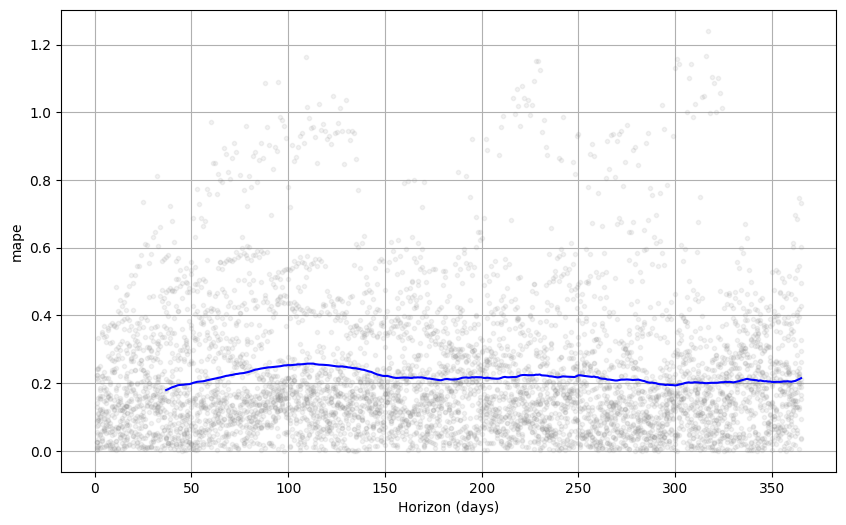

In [12]:
cv(m)